# Определение перспективного тарифа для телеком-компании

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов:
- Тариф «Смарт». Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика. Стоимость услуг сверх тарифного пакета: минута разговора - 3 рубля, сообщение - 3 рубля, 1 Гб интернет-трафика - 200 рублей.

- Тариф «Ультра». Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика. Стоимость услуг сверх тарифного пакета: минута разговора - 1 рубль, сообщение - 1 рубль, 1 Гб интернет-трафика - 150 рублей.

Ознакомимся с данными и изучим общую информацию. Проверим и подготовим данные для анализа. Проанализируем поведение клиентов оператора и проверим гипотезы.

## Изучение файлов с данными

 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df_calls.info()
display(df_calls.head())
display(df_calls.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


In [5]:
df_internet.info()
display(df_internet.head())
display(df_internet.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,mb_used,user_id
count,"149,396.00","149,396.00","149,396.00"
mean,"74,697.50",370.19,"1,252.10"
std,"43,127.05",278.30,144.05
min,0.00,0.00,"1,000.00"
25%,"37,348.75",138.19,"1,130.00"
50%,"74,697.50",348.01,"1,251.00"
75%,"112,046.25",559.55,"1,380.00"
max,"149,395.00","1,724.83","1,499.00"


In [6]:
df_messages.info()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
df_tariffs.info()
df_tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
df_users.info()
display(df_users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


На первый взгляд с данными все в порядке. В числовых значениях среднее и медиана не сильно отличаются, минусовые значения отсутствуют.

## Предобработка данных

В таблице `df_internet` есть лишняя колонка `Unnamed: 0` с номерами строк. Удалим ее.

In [9]:
df_internet.drop(columns='Unnamed: 0', axis = 1, inplace=True)

In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


### Проверка типов данных

Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

Приведем `дату` к нормальному типу во всех таблицах.

In [11]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [12]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [13]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [14]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

Привели даты к нормальному типу. Остальные типы данных имеют правильный тип.

### Пропуски в датафрейме

Проверим данные на пропуски.

In [15]:
df_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [16]:
df_internet.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [17]:
df_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [18]:
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Пропуски есть только в `churn_date` — дата прекращения пользования тарифом. Нам эти данные не нужны для анализа, оставим как есть.

### Дубликаты в датафрейме
Проверим, есть ли в данных дубликаты.

In [19]:
df_calls.duplicated().sum()

0

In [20]:
df_internet.duplicated().sum()

0

In [21]:
df_messages.duplicated().sum()

0

In [22]:
df_users.duplicated().sum()

0

Явные дубликаты в данных отсутствуют.

### Проверка значений

Проверим данные на ошибки и неявные дубликаты.

In [23]:
display(df_users.head(3))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [24]:
df_users['age'].unique()

array([52, 41, 59, 23, 68, 67, 21, 65, 63, 24, 26, 44, 38, 36, 64, 58, 73,
       71, 61, 72, 42, 56, 32, 62, 20, 51, 28, 66, 31, 37, 47, 40, 69, 48,
       33, 39, 43, 46, 45, 55, 53, 34, 49, 25, 18, 70, 50, 19, 54, 60, 29,
       27, 74, 22, 30, 75, 57, 35])

In [25]:
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [26]:
df_users['first_name'].unique()

array(['Рафаил', 'Иван', 'Евгений', 'Белла', 'Татьяна', 'Афанасий',
       'Леонид', 'Юна', 'Рустэм', 'Василиса', 'Эдуард', 'Веселина',
       'Варлам', 'Борис', 'Яков', 'Рузана', 'Марица', 'Мария', 'Матвей',
       'Игнатий', 'Тала', 'Святослав', 'Людмила', 'Иулиан', 'Владислав',
       'Рустем', 'Алексей', 'Мариетта', 'Лаврентий', 'Инна', 'Лия',
       'Розалия', 'Анжелика', 'Изольда', 'Агнесса', 'Юрий', 'Михаил',
       'Константин', 'Марианна', 'Иннокентий', 'Джемма', 'Екатерина',
       'Милица', 'Лола', 'Габриель', 'Кристина', 'Павел', 'Ренальд',
       'Луиза', 'Радислав', 'Динара', 'Лукий', 'Глеб', 'Тамара',
       'Александр', 'Таира', 'Роза', 'Исак', 'Юзефа', 'Ким', 'Гордей',
       'Эльза', 'Гектор', 'Андрей', 'Рафаэль', 'Фёдор', 'Харитон',
       'Еремей', 'Всеволод', 'Софья', 'Авксентий', 'Виолетта', 'Ириней',
       'Гелена', 'Ксения', 'Вера', 'Вениамин', 'Вероника', 'Даниэла',
       'Алла', 'Элеонора', 'Аюна', 'Руслан', 'Онисим', 'Марта', 'Эльвира',
       'Габриэль', '

In [27]:
df_users['last_name'].unique()

array(['Верещагин', 'Ежов', 'Абрамович', 'Белякова', 'Авдеенко', 'Горлов',
       'Ермолаев', 'Березина', 'Пономарёв', 'Блинова', 'Кононов',
       'Алёшко', 'Соловьев', 'Андреенко', 'Акинфьев', 'Алюшина',
       'Сазонова', 'Аленникова', 'Золотов', 'Круглов', 'Костина',
       'Тихонов', 'Трофимова', 'Мельникова', 'Антипов', 'Акинин',
       'Бородин', 'Авдеев', 'Евсеев', 'Селезнев', 'Русанова', 'Тимофеев',
       'Игнатьева', 'Бабушкина', 'Бондарев', 'Аракина', 'Андропова',
       'Архипова', 'Денисова', 'Одинцов', 'Кравцов', 'Добрынин',
       'Родионова', 'Рябов', 'Карасева', 'Александрова', 'Меркулова',
       'Мясникова', 'Ларин', 'Аничкина', 'Сомова', 'Панов', 'Фёдоров',
       'Платонова', 'Артемьев', 'Дьячкова', 'Глушков', 'Свиридов',
       'Рудаков', 'Ситникова', 'Коршунов', 'Климова', 'Алфеева',
       'Игнатова', 'Малахов', 'Абашкина', 'Демьянов', 'Кочетов',
       'Селиванова', 'Чумаков', 'Андрейкин', 'Павловский', 'Никулин',
       'Шарапов', 'Кольцова', 'Литвинов', 'Авр

In [28]:
df_users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

После изучения файлов и проверки данных - ошибок не выявлено. Числовые и категориальные значения в порядке. Текстовые данные имеют одинаковый тип записи. Неявных дубликатов не выявлено.

### Добавление новых данных

Посчитаем и добавим для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Добавим столбцы с информацией о месяце операции.

In [29]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

In [30]:
df_calls.head(3)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6


In [31]:
df_messages.head(3)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8


In [32]:
df_internet.head(3)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,"1,052.81",2018-09-07,1000,9
2,1000_2,"1,197.26",2018-06-25,1000,6


Оператор округляет все разговоры в большую сторону до минуты. Округлим время разговоров до целых минут в большую сторону.

In [33]:
df_calls['duration'] = np.ceil(df_calls['duration'])

Добавим столбец с названием тарифа.

In [34]:
df_calls = pd.merge(df_calls, df_users[['user_id', 'tariff']], 'outer', on=['user_id'])
df_messages = pd.merge(df_messages, df_users[['user_id', 'tariff']], 'outer', on=['user_id'])
df_internet = pd.merge(df_internet, df_users[['user_id', 'tariff']], 'outer', on=['user_id'])

In [35]:
df_internet.head(2)

,id,mb_used,session_date,user_id,month,tariff
0,1000_0,112.95,2018-11-25,1000,11.00,ultra
1,1000_1,"1,052.81",2018-09-07,1000,9.00,ultra


Посчитаем и добавим количество сделанных звонков и израсходованных минут по месяцам:

In [36]:
calls_pivot = df_calls.pivot_table(
    index=['user_id', 'tariff', 'month'],
    values='duration',
    aggfunc=['count', 'sum']
    ).droplevel(level=1, axis=1)

In [37]:
calls_pivot = calls_pivot.rename(columns={'count':'calls_count', 'sum':'calls_sum'})
calls_pivot.head()

calls_count  calls_sum
user_id tariff month                        
1000    ultra  5.00            22     159.00
               6.00            43     172.00
               7.00            47     340.00
               8.00            52     408.00
               9.00            58     466.00

Добавим количество отправленных сообщений по месяцам:

In [38]:
msg_pivot = df_messages.pivot_table(index=['user_id', 'tariff', 'month'], values='id', aggfunc='count')
msg_pivot = msg_pivot.rename(columns={'id':'msg_count'})
msg_pivot.head()

msg_count
user_id tariff month           
1000    ultra  5.00          22
               6.00          60
               7.00          75
               8.00          81
               9.00          57

А так же добавим объем израсходованного интернет-трафика:

In [39]:
inet_pivot = df_internet.pivot_table(index=['user_id', 'tariff', 'month'], values='mb_used', aggfunc='sum')
inet_pivot.head()

mb_used
user_id tariff month          
1000    ultra  5.00   2,253.49
               6.00  23,233.77
               7.00  14,003.64
               8.00  14,055.93
               9.00  14,568.91

Переведем использованные мегабайты в гигабайты по правилам оператора с округлением в большую сторону.

In [40]:
def mb_to_gb(value):
    if (value % 1024) > 0:
        res = value // 1024 + 1
    else:
        res = value / 1024
    return res

In [41]:
inet_pivot['gb_used'] = inet_pivot['mb_used'].apply(mb_to_gb)

In [42]:
inet_pivot.head(3)

mb_used  gb_used
user_id tariff month                   
1000    ultra  5.00   2,253.49     3.00
               6.00  23,233.77    23.00
               7.00  14,003.64    14.00

In [43]:
inet_pivot = inet_pivot.reset_index()

In [44]:
inet_pivot['user_id'].unique().shape

(497,)

In [45]:
msg_pivot = msg_pivot.reset_index()

In [46]:
msg_pivot['user_id'].unique().shape

(426,)

In [47]:
calls_pivot = calls_pivot.reset_index()

In [48]:
calls_pivot['user_id'].unique().shape

(492,)

In [49]:
inet_pivot.isna().sum()

user_id    0
tariff     0
month      0
mb_used    0
gb_used    0
dtype: int64

Есть пользователи которые не пользовались услугами. 

Объединим таблицы в одну сводную:

In [50]:
all_data = pd.merge(inet_pivot, calls_pivot, 'outer', on=['user_id', 'tariff', 'month'])
all_data = pd.merge(all_data, msg_pivot, 'outer', on=['user_id', 'tariff', 'month'])

При объединении таблицы могли появиться пропуски, т.к. некоторые пользователи не отправляли сообщения или не пользовались интернетом. Проверим и заменим их на 0.

In [51]:
all_data.head(3)

,user_id,tariff,month,mb_used,gb_used,calls_count,calls_sum,msg_count
0,1000,ultra,5.00,"2,253.49",3.00,22.00,159.00,22.00
1,1000,ultra,6.00,"23,233.77",23.00,43.00,172.00,60.00
2,1000,ultra,7.00,"14,003.64",14.00,47.00,340.00,75.00


In [52]:
all_data.isna().sum()

user_id          0
tariff           0
month            0
mb_used         11
gb_used         11
calls_count     40
calls_sum       40
msg_count      497
dtype: int64

In [53]:
all_data['calls_count'] = all_data['calls_count'].fillna(value=0)
all_data['calls_sum'] = all_data['calls_sum'].fillna(value=0)
all_data['msg_count'] = all_data['msg_count'].fillna(value=0)
all_data['mb_used'] = all_data['mb_used'].fillna(value=0)
all_data['gb_used'] = all_data['gb_used'].fillna(value=0)

In [54]:
all_data.isna().sum()

user_id        0
tariff         0
month          0
mb_used        0
gb_used        0
calls_count    0
calls_sum      0
msg_count      0
dtype: int64

In [55]:
all_data.user_id.unique().shape

(498,)

2 пользователя вообще не пользовались никакими услугами.

In [56]:
all_data = all_data.pivot_table(index=['user_id', 'tariff', 'month'])

Посчитаем помесячную выручку с каждого пользователя в зависимости от тарифа.

In [57]:
def income(row):
    name = row['tariff']
    tariff = df_tariffs.query('tariff_name == @name')
    calls = row['calls_sum'] - tariff['minutes_included'].values[0]
    msg = row['msg_count'] - tariff['messages_included'].values[0]
    gb = row['gb_used'] - tariff['mb_per_month_included'].values[0] / 1024
    res = tariff['rub_monthly_fee'].values[0]
    if calls > 0:
        res += calls * tariff['rub_per_minute'].values[0]
    if msg > 0:
        res += msg * tariff['rub_per_message'].values[0]
    if gb > 0:
        res += gb * tariff['rub_per_gb'].values[0]
    return res

In [58]:
all_data = all_data.reset_index()

In [59]:
all_data['income_tot'] = all_data.apply(income, axis=1)

In [60]:
all_data.head(3)

,user_id,tariff,month,calls_count,calls_sum,gb_used,mb_used,msg_count,income_tot
0,1000,ultra,5.00,22.00,159.00,3.00,"2,253.49",22.00,"1,950.00"
1,1000,ultra,6.00,43.00,172.00,23.00,"23,233.77",60.00,"1,950.00"
2,1000,ultra,7.00,47.00,340.00,14.00,"14,003.64",75.00,"1,950.00"


In [61]:
all_data.user_id.unique().shape

(498,)

Добавили новые данные по месяцам и заполнили образовавшиеся пропуски.

### Краткий вывод



В таблице df_internet удалили лишнюю колонку. Привели даты к нормальному типу. Проверили данные на пропуски и дубликаты.
<br>Изучили и проверили числовые, категориальные и текстовые данные на возможные ошибки и не явные дубликаты. 

<br>Добавили колонки с информацией о месяце и тарифе. Посчитали и добавили для каждого пользователя информацию по месяцам:
- количество сделанных звонков и израсходованных минут;
- количество отправленных сообщений;
- объем израсходованного интернет-трафика;
- помесячную выручку с каждого пользователя в зависимости от тарифного плана.<br>

Объединили все данные в одну сводную таблицу.

## Исследовательский анализ данных


In [62]:
smart_df = all_data.query('tariff == "smart"')

In [63]:
smart_df.describe()

,user_id,month,calls_count,calls_sum,gb_used,mb_used,msg_count,income_tot
count,"2,229.00","2,229.00","2,229.00","2,229.00","2,229.00","2,229.00","2,229.00","2,229.00"
mean,"1,246.51",8.35,58.46,417.93,16.33,"16,208.39",33.38,"1,289.97"
std,146.12,2.92,25.94,190.31,5.75,"5,870.48",28.23,818.40
min,"1,001.00",1.00,0.00,0.00,0.00,0.00,0.00,550.00
25%,"1,121.00",6.00,40.00,282.00,13.00,"12,643.01",10.00,550.00
50%,"1,239.00",9.00,60.00,422.00,17.00,"16,506.84",28.00,"1,023.00"
75%,"1,376.00",11.00,76.00,545.00,20.00,"20,042.93",51.00,"1,750.00"
max,"1,499.00",12.00,198.00,"1,435.00",38.00,"38,552.45",143.00,"6,770.00"


Пользователи тарифа "Smart" в среднем переплачивают сверху абонентской платы почти в 2,5 раза. Расходуют больше интернет-трафика, чем включено в тариф.

In [64]:
ultra_df = all_data.query('tariff == "ultra"')

In [65]:
ultra_df.describe()

,user_id,month,calls_count,calls_sum,gb_used,mb_used,msg_count,income_tot
count,985.00,985.00,985.00,985.00,985.00,985.00,985.00,985.00
mean,"1,263.09",8.25,73.39,526.62,19.49,"19,468.81",49.36,"2,070.15"
std,140.69,2.87,43.92,317.61,9.85,"10,087.17",47.80,376.19
min,"1,000.00",1.00,0.00,0.00,0.00,0.00,0.00,"1,950.00"
25%,"1,143.00",6.00,41.00,284.00,12.00,"11,770.26",6.00,"1,950.00"
50%,"1,277.00",9.00,74.00,518.00,19.00,"19,308.01",38.00,"1,950.00"
75%,"1,381.00",11.00,104.00,752.00,27.00,"26,837.69",79.00,"1,950.00"
max,"1,495.00",12.00,244.00,"1,673.00",49.00,"49,745.69",224.00,"4,800.00"


Пользователи тарифа "Ultra" в среднем практически не переплачивают выше ежемесячной платы и не расходуют лишние минуты, сообщения и интернет-трафик.<br>
Средняя месячная выручка с каждого пользователя больше на тарифе "Ultra".

Рассчитаем дисперсию:

In [66]:
var_df = pd.DataFrame(
    {'tariff': ['smart', 'ultra'],
     'calls_sum': [smart_df['calls_sum'].var(), ultra_df['calls_sum'].var()],
     'gb_used': [smart_df['gb_used'].var(), ultra_df['gb_used'].var()],
     'msg_count': [smart_df['msg_count'].var(), ultra_df['msg_count'].var()],
     'income_tot': [smart_df['income_tot'].var(), ultra_df['income_tot'].var()],
})

In [67]:
var_df.head()

,tariff,calls_sum,gb_used,msg_count,income_tot
0,smart,"36,219.32",33.03,796.81,"669,785.71"
1,ultra,"100,873.63",97.09,"2,285.27","141,516.75"


Сделаем сводную таблицу с суммами используемых услуг и выручки для разных тарифов.

In [68]:
sum_all_data_pvt = all_data.pivot_table(
    index=['month'],
    values=['calls_sum', 'msg_count', 'gb_used', 'income_tot'],
    columns=['tariff'],
    aggfunc=['sum']
    ).droplevel(level=0, axis=1)

In [69]:
mean_all_data_pvt = all_data.pivot_table(
    index=['month'],
    values=['calls_sum', 'msg_count', 'gb_used', 'income_tot'],
    columns=['tariff'],
    aggfunc=['mean']
    ).droplevel(level=0, axis=1)

In [70]:
sum_all_data_pvt.head(3)

calls_sum            gb_used        income_tot           msg_count  \
tariff     smart     ultra    smart  ultra      smart     ultra     smart   
month                                                                       
1.00    6,931.00  3,853.00   297.00 119.00  24,525.00 17,550.00    620.00   
2.00   17,324.00  7,131.00   687.00 288.00  48,001.00 47,400.00  1,397.00   
3.00   30,034.00 18,117.00 1,173.00 653.00  89,676.00 74,550.00  2,453.00   

                 
tariff    ultra  
month            
1.00     304.00  
2.00     527.00  
3.00   1,195.00

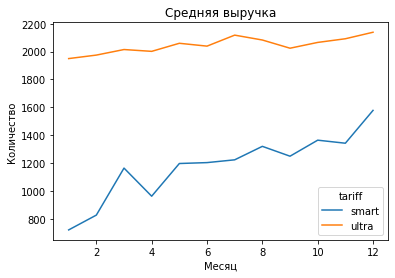

In [71]:
mean_all_data_pvt['income_tot'].plot()
plt.title('Средняя выручка')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

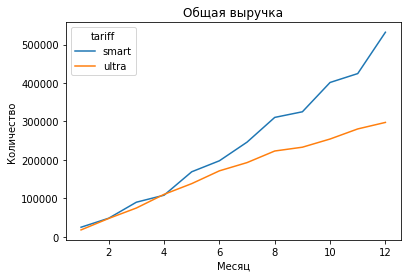

In [72]:
sum_all_data_pvt['income_tot'].plot()
plt.title('Общая выручка')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

Средняя помесячная выручка с каждого пользователя больше на тарифе "Ultra", но общая выручка больше с пользователей тарифа "Smart".

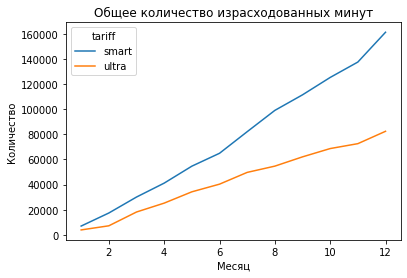

In [73]:
sum_all_data_pvt['calls_sum'].plot()
plt.title('Общее количество израсходованных минут')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

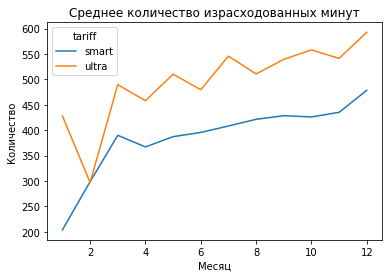

In [74]:
mean_all_data_pvt['calls_sum'].plot()
plt.title('Среднее количество израсходованных минут')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

Общее количество израсходованных минут у пользователей тарифа "Smart" больше, но в среднем они расходуют меньше минут.

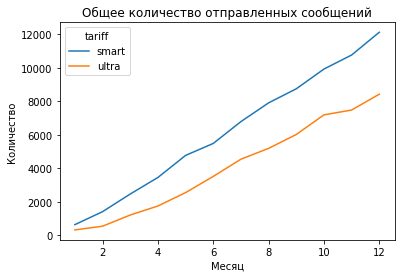

In [75]:
sum_all_data_pvt['msg_count'].plot()
plt.title('Общее количество отправленных сообщений')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

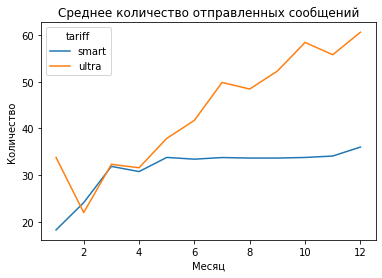

In [76]:
mean_all_data_pvt['msg_count'].plot()
plt.title('Среднее количество отправленных сообщений')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

Общее количество отправленных сообщений у пользователей тарифа "Smart" больше, но в среднем они отправляют меньше сообщений.

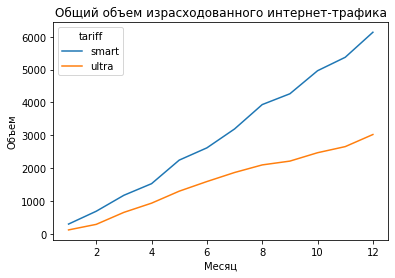

In [77]:
sum_all_data_pvt['gb_used'].plot()
plt.title('Общий объем израсходованного интернет-трафика')
plt.xlabel('Месяц')
plt.ylabel('Объем')
plt.show()

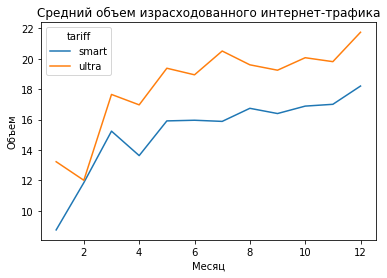

In [78]:
mean_all_data_pvt['gb_used'].plot()
plt.title('Средний объем израсходованного интернет-трафика')
plt.xlabel('Месяц')
plt.ylabel('Объем')
plt.show()

Тут тоже аналогично - общий объем трафика у пользователей тарифа "Smart" больше, но в среднем они расходуют меньше.

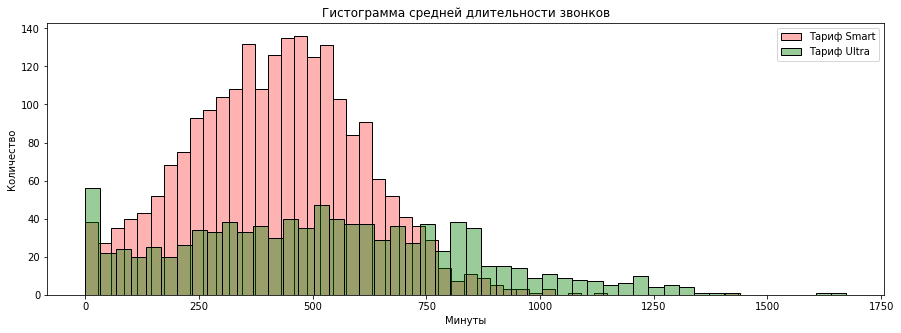

In [79]:
plt.figure(figsize = (15,5))
sns.histplot(smart_df['calls_sum'], bins=50, label='Тариф Smart', color='red', alpha=0.3)
sns.histplot(ultra_df['calls_sum'], bins=50, label='Тариф Ultra', color='green', alpha=.4)
plt.title('Гистограмма средней длительности звонков')
plt.xlabel('Минуты')
plt.ylabel('Количество')
plt.legend()
plt.show()

Гистограммы средней длительности звонков имеют нормальное распределение с немного смещенным центром распределения.

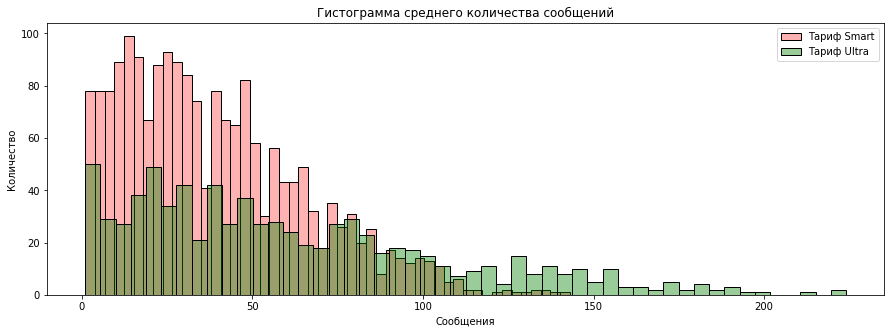

In [80]:
plt.figure(figsize = (15,5))
sns.histplot(smart_df.query('msg_count > 0')['msg_count'], bins=50, label='Тариф Smart', color='red', alpha=0.3)
sns.histplot(ultra_df.query('msg_count > 0')['msg_count'], bins=50, label='Тариф Ultra', color='green', alpha=.4)
plt.title('Гистограмма среднего количества сообщений')
plt.xlabel('Сообщения')
plt.ylabel('Количество')
plt.legend()
plt.show()

Гистограммы среднего количества сообщений имеют геометрическое распределение.

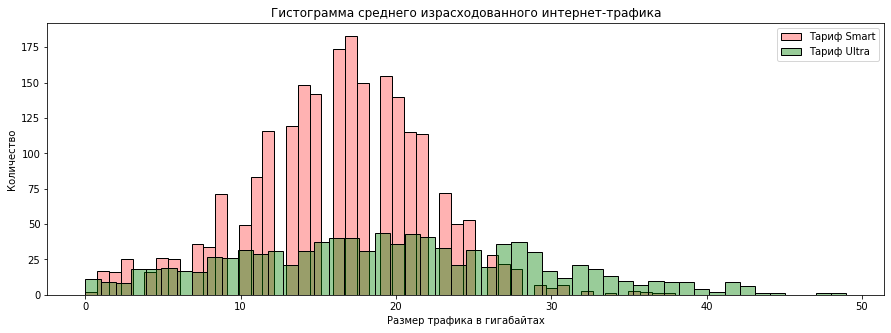

In [81]:
plt.figure(figsize = (15,5))
sns.histplot(smart_df['gb_used'], bins=50, label='Тариф Smart', color='red', alpha=0.3)
sns.histplot(ultra_df['gb_used'], bins=50, label='Тариф Ultra', color='green', alpha=.4)
plt.title('Гистограмма среднего израсходованного интернет-трафика')
plt.xlabel('Размер трафика в гигабайтах')
plt.ylabel('Количество')
plt.legend()
plt.show()

Гистограммы среднего израсходованного интернет-трафика имеют нормальное распределение.

### Краткий вывод:


Пользователи тарифа "Smart" в среднем переплачивают сверх абонентской платы и расходуют больше интернет-трафика, чем включено в тариф. Пользователи тарифа "Ultra" в среднем практически не переплачивают выше ежемесячной платы и не расходуют лишние минуты, сообщения и интернет-трафик.<br>

Средняя месячная выручка с каждого пользователя больше на тарифе "Ultra", но общая выручка больше с пользователей тарифа "Smart". Тариф "Smart" приносит больше денег.<br>

Пользователи тарифа "Smart" в общем расходуют больше минут, сообщений и интернет трафика, но в среднем расходуют меньше пользователей тарифа "Ultra". В тарифе "Ultra" пользователи расходуют интернет-трафик не намного больше, а пользователи тарифа "Smart" в среднем практически всегда тратят больше включенных в тариф 15Гб трафика.<br>

Гистограммы средней длительности звонков и среднего израсходованного интернет-трафика имеют нормальное распределение, а гистограммы среднего количества сообщений имеют геометрическое распределение.

## Проверка гипотез



Проверим гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. <br>
Если мы выясняем, есть ли разница между совокупностями, то нулевая гипотеза в нашем случае будет такая: «Разницы нет, средняя выручка пользователей тарифов «Ультра» и «Смарт» равна!». Если отвергается нулевая гипотеза, то принимается альтернативная - "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются".

Для проверки гипотез будем использовать t-тест и уровень значимости p-value.

In [82]:
alpha = 0.05

results = st.ttest_ind(
    smart_df['income_tot'],
    ultra_df['income_tot'],
    equal_var=False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу.


Можно сделать вывод, что, скорее всего, предположение всё-таки неверно и принять альтернативную гипотезу - "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются".

Посмотрим на график средней выручки.

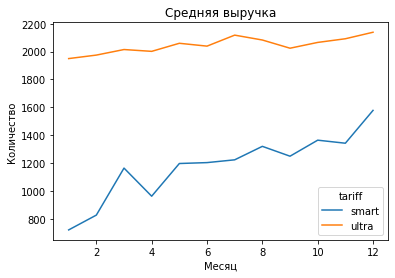

In [83]:
mean_all_data_pvt['income_tot'].plot()
plt.title('Средняя выручка')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

Для проверки второй гипотезы добавим в сводную таблицу колонку с названием города:

In [84]:
all_data = pd.merge(all_data, df_users[['user_id', 'city']], 'left', on=['user_id'])

In [85]:
def city_group(name):
    if name == "Москва":
        return 'Москва'
    else:
        return 'Другой'

In [86]:
all_data['city_group'] = all_data['city'].apply(city_group)

Аналогично первой, для второй проверки гипотезы Н0 и Н1 будут такими:
- Н0 - средняя выручка пользователей из Москвы равна выручке других регионов
- Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [87]:
alpha = 0.05

results = st.ttest_ind(
    all_data.query('city == "Москва"')['income_tot'],
    all_data.query('city != "Москва"')['income_tot'],
    equal_var=False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу.


Данные не дают основания отвергнуть нулевую гипотезу и принять альтернативную - "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.".

Взглянем на график средней выручки пользователей из Москвы и других регионов.

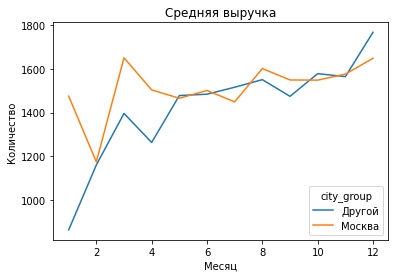

In [88]:
all_data.pivot_table(
    index=['month'],
    values=['calls_sum', 'msg_count', 'gb_used', 'income_tot'],
    columns=['city_group'],
    aggfunc=['mean']
    ).droplevel(level=0, axis=1)['income_tot'].plot()
plt.title('Средняя выручка')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

### Краткий вывод:


На основе проверок:
- гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" принимаем.<br>
- гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" не принимаем.


## Общий вывод

Изучили файлы с данными, исправили одну таблицу - удалили лишнюю колонку. Привели даты к нормальному типу. Проверили данные на пропуски и дубликаты.
Изучили и проверили числовые, категориальные и текстовые данные на возможные ошибки и не явные дубликаты.<br>

Добавили колонки с информацией о месяце и тарифе. Посчитали и добавили для каждого пользователя информацию по месяцам:
- количество сделанных звонков и израсходованных минут;
- количество отправленных сообщений;
- объем израсходованного интернет-трафика;
- помесячную выручку с каждого пользователя в зависимости от тарифного плана. <br>
Объединили все данные в одну сводную таблицу.

Пользователи тарифа "Smart" в среднем переплачивают сверх абонентской платы и расходуют больше интернет-трафика, чем включено в тариф. Пользователи тарифа "Ultra" в среднем практически не переплачивают выше ежемесячной платы и не расходуют лишние минуты, сообщения и интернет-трафик.<br>

Средняя месячная выручка с каждого пользователя больше на тарифе "Ultra", но общая выручка больше с пользователей тарифа "Smart". Тариф "Smart" приносит больше денег.<br>

Так же на графиках ниже видно, что общая и средняя выручка с пользователей тарифа "Smart" растет.

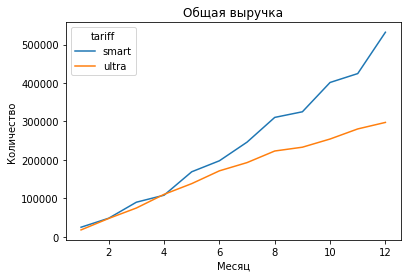

In [89]:
sum_all_data_pvt['income_tot'].plot()
plt.title('Общая выручка')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

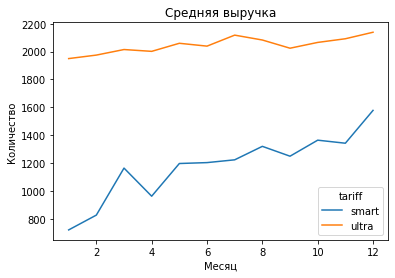

In [90]:
mean_all_data_pvt['income_tot'].plot()
plt.title('Средняя выручка')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

Пользователи тарифа "Smart" в общем расходуют больше минут, сообщений и интернет трафика, но в среднем расходуют меньше пользователей тарифа "Ultra". В тарифе "Ultra" пользователи расходуют интернет-трафик не намного больше, а пользователи тарифа "Smart" в среднем практически всегда тратят больше включенных в тариф 15Гб трафика.<br>

Гистограммы средней длительности звонков и среднего израсходованного интернет-трафика имеют нормальное распределение, а гистограммы среднего количества сообщений имеют геометрическое распределение.

На основе проверок гипотез:
- гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" принимаем.
- гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" не принимаем.